<a href="https://colab.research.google.com/github/iisc-ts-group6/M5_NLP_miniproject_Mar3/blob/main/Siri_M5_NB_MiniProject_1_ResumeClassification_Using_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project 1: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Resume dataset
* perform multinomial Naive Bayes classification on the Resume dataset

### Dataset description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decision making.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Downloading the data

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
print("Data Downloaded Successfuly!!")
!ls | grep '.csv'

Data Downloaded Successfuly!!
UpdatedResumeDataSet.csv


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
print(df.shape)
df.tail(10)      # first 10 rows

(962, 2)


,Category,Resume
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
953,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
955,Testing,â¢ Good logical and analytical skills â¢ Pos...
956,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
# Display the distinct categories of resume
df['Category'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

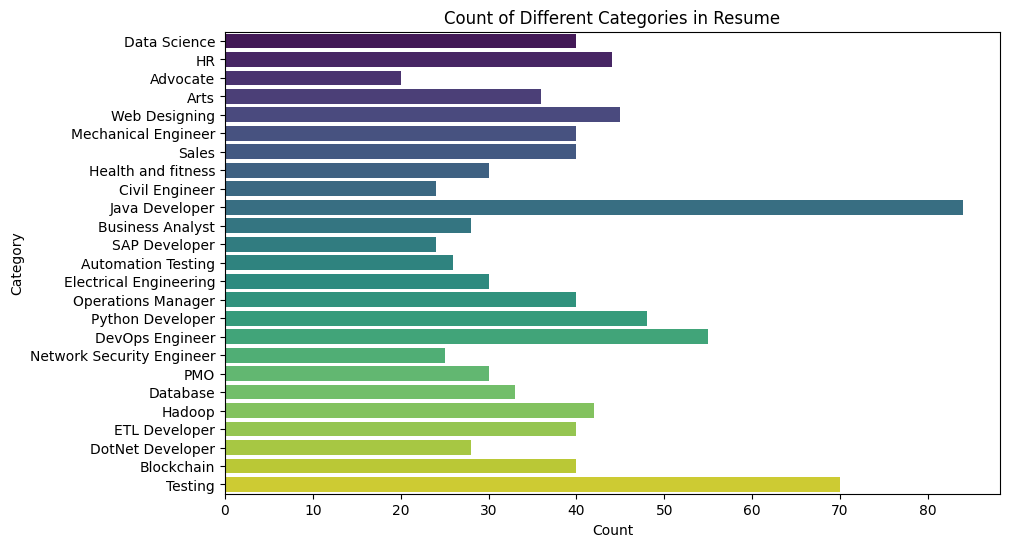

In [ ]:
# YOUR CODE HERE
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, palette='viridis')
plt.title('Count of Different Categories in Resume')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

<Figure size 2500x2500 with 0 Axes>

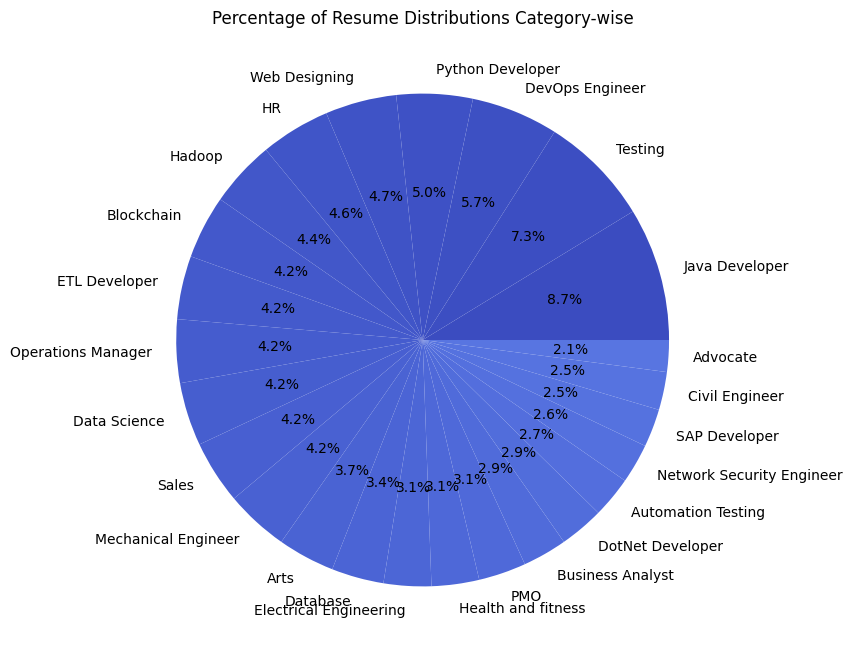

In [ ]:
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)

plt.figure(figsize=(8, 8))
colors = plt.cm.coolwarm(range(len(targetCounts)))
#colors = plt.get_cmap('coolwarm')(range(len(targetCounts)))
plt.pie(targetCounts, labels=targetCounts.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Resume Distributions Category-wise')
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case [0.5 Mark]**




In [ ]:
# Convert all characters to lowercase
# YOUR CODE HERE
df['Resume'] = df['Resume'].str.lower()
df.head(10)

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."
5,Data Science,"skills c basics, iot, python, matlab, data sci..."
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...
7,Data Science,education details \r\n b.tech rayat and bahr...
8,Data Science,personal skills â¢ ability to quickly grasp t...
9,Data Science,expertise â data and quantitative analysis â...


### Cleaning resumes' text data

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature).


In [ ]:
import re
def cleanResume(resumeText):
    re.sub(r'http\S+', '', stringliteral)
    #
    #


In [ ]:
def cleanResume(resumeText):
    # Remove URLs
    resumeText = re.sub(r'http\S+|www.\S+', '', resumeText)

    # Remove RT, cc
    resumeText = re.sub(r'\b(?:RT|cc)\b', '', resumeText)

    # Remove hashtags and mentions
    resumeText = re.sub(r'[@#]\w+', '', resumeText)

    # Remove punctuation
    resumeText = re.sub(r'[^\w\s]', '', resumeText)

    # Remove extra whitespace
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()

    return resumeText

In [ ]:
 df['cleaned_resume'] = df['Resume'].apply(cleanResume)

In [ ]:
df.head()

,Category,Resume,New Feature,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â r â python â sap hana â tableau â sap...,skills â r â python â sap hana â tableau â sap...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...


In [ ]:
df.drop(columns=['New Feature'], inplace=True)

In [ ]:
df.head(10)

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â r â python â sap hana â tableau â sap...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills â python â tableau â data visualization...
7,Data Science,education details \r\n b.tech rayat and bahr...,education details btech rayat and bahra instit...
8,Data Science,personal skills â¢ ability to quickly grasp t...,personal skills â ability to quickly grasp tec...
9,Data Science,expertise â data and quantitative analysis â...,expertise â data and quantitative analysis â d...


In [ ]:
# removing the html strips
def strip_html(text):
    # BeautifulSoup is a useful library for extracting data from HTML and XML documents
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

    # removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
 # apply the function defined above and save the
 df['cleaned_resume'] = df['cleaned_resume'].apply(strip_html)
 df['cleaned_resume'] = df['cleaned_resume'].apply(remove_between_square_brackets)
 df['cleaned_resume'] = df['cleaned_resume'].apply(denoise_text)



In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â r â python â sap hana â tableau â sap...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
sent_lens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)

print(len(sent_lens))
print(max(sent_lens))

962
2110


### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

1. Tokenize the input words into individual tokens and store it in an array
2. Using `nltk.corpus.stopwords`, remove the stopwords

Hint: See Module 1 - Assignment 4 'Text Classification using Naive Bayes'


**Exercise 7: Use `nltk` package to find the most common words from the `cleaned resume` column [2 Marks]**

**Hint:**
* Use `nltk.FreqDist`


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# stopwords
# YOUR CODE HERE to print the stopwords in english language
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

# Tokenize the cleaned resume text into words
word_tokens = word_tokenize(' '.join(df['cleaned_resume']))

# Compute the frequency distribution of words
freq_dist = FreqDist(word_tokens)

# Get the 10 most common words
most_common_words = freq_dist.most_common(20)

for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# most common words
# Get the most common words and their frequencies
most_common_words = freq_dist.most_common(100)

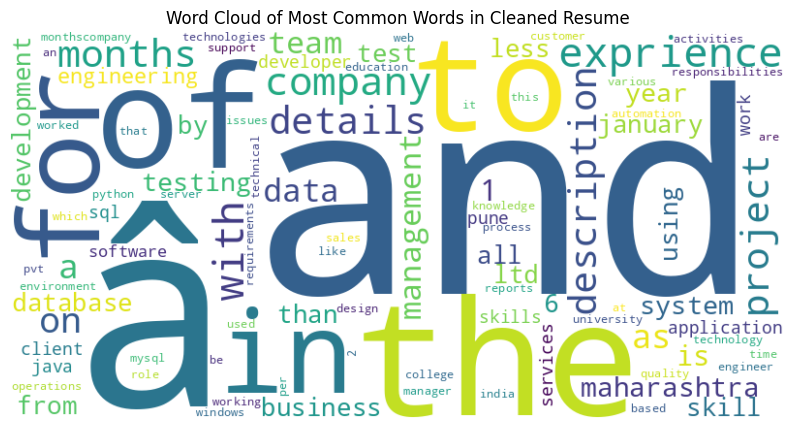

In [ ]:
# YOUR CODE HERE to show the most common word using WordCloud
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Cleaned Resume')
plt.show()

**Exercise 8: Convert the categorical variable `Category` to a numerical feature and make a different column, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
from sklearn.preprocessing import LabelEncoder

# YOUR CODE HERE

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the 'Category' column and transform it to numerical values
df['Category_numerical'] = label_encoder.fit_transform(df['Category'])

# Display the mapping between original categories and numerical values
print("Mapping of categories to numerical values:")
for category, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {numerical_value}")

Mapping of categories to numerical values:
Advocate: 0
Arts: 1
Automation Testing: 2
Blockchain: 3
Business Analyst: 4
Civil Engineer: 5
Data Science: 6
Database: 7
DevOps Engineer: 8
DotNet Developer: 9
ETL Developer: 10
Electrical Engineering: 11
HR: 12
Hadoop: 13
Health and fitness: 14
Java Developer: 15
Mechanical Engineer: 16
Network Security Engineer: 17
Operations Manager: 18
PMO: 19
Python Developer: 20
SAP Developer: 21
Sales: 22
Testing: 23
Web Designing: 24


In [ ]:
df.head(10)

,Category,Resume,cleaned_resume,Category_numerical
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...,6
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â r â python â sap hana â tableau â sap...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...,6
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills â python â tableau â data visualization...,6
7,Data Science,education details \r\n b.tech rayat and bahr...,education details btech rayat and bahra instit...,6
8,Data Science,personal skills â¢ ability to quickly grasp t...,personal skills â ability to quickly grasp tec...,6
9,Data Science,expertise â data and quantitative analysis â...,expertise â data and quantitative analysis â d...,6


In [ ]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# transformed train reviews
cv_train_reviews = cv.fit_transform(df['cleaned_resume'])

# transformed test reviews
#cv_test_reviews = cv.transform(X_test)

print('CV_train:', cv_train_reviews.shape)


CV_train: (962, 3620)


### Feature Extraction

**Exercise 9: Convert the text to feature vectors by applying `tfidf vectorizer` to the Label encoded category made above [2 Marks]**

`TF-IDF`will tokenize documents, learn the vocabulary, inverse document frequency weightings, and allow you to encode new documents

**Hint:** Use [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).



In [ ]:
# YOUR CODE HERE

from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1.0, use_idf=True, ngram_range = (1,3))
#tv = TfidfVectorizer(min_df=1, max_df=1.0, max_features=5000, use_idf=True, ngram_range=(1,3))

# Instantiate TfidfVectorizer with adjusted min_df parameter

tfidf_features = tv.fit_transform(df['cleaned_resume'])

# Display the shape of the TF-IDF feature vectors
print("Shape of TF-IDF feature vectors:", tfidf_features.shape)

print(tfidf_features)


Shape of TF-IDF feature vectors: (962, 98770)
  (0, 58070)	0.023276141742290184
  (0, 14623)	0.023276141742290184
  (0, 23109)	0.023276141742290184
  (0, 47819)	0.023276141742290184
  (0, 80487)	0.023276141742290184
  (0, 47400)	0.023276141742290184
  (0, 41446)	0.023276141742290184
  (0, 84499)	0.023276141742290184
  (0, 90775)	0.023276141742290184
  (0, 5547)	0.023276141742290184
  (0, 3904)	0.023276141742290184
  (0, 74611)	0.023276141742290184
  (0, 15832)	0.023276141742290184
  (0, 37252)	0.023276141742290184
  (0, 59155)	0.023276141742290184
  (0, 44064)	0.023276141742290184
  (0, 13613)	0.023276141742290184
  (0, 16194)	0.023276141742290184
  (0, 96084)	0.02034476138848072
  (0, 9429)	0.023276141742290184
  (0, 85874)	0.023276141742290184
  (0, 41777)	0.023276141742290184
  (0, 36215)	0.023276141742290184
  (0, 83084)	0.023276141742290184
  (0, 2961)	0.023276141742290184
  :	:
  (961, 89073)	0.007542497340787319
  (961, 31144)	0.01893792162349061
  (961, 88684)	0.016056174262944

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TfidfVectorizer on the text data using the label-encoded category as vocabulary
tfidf_vectorizer.fit(df['Category_numerical'].astype(str))

# Transform the text data into TF-IDF feature vectors
tfidf_features = tfidf_vectorizer.transform(df['cleaned_resume'])

# Display the shape of the TF-IDF feature vectors
print("Shape of TF-IDF feature vectors:", tfidf_features.shape)

print(tfidf_features)

Shape of TF-IDF feature vectors: (962, 15)
  (0, 14)	1.0
  (1, 2)	1.0
  (3, 11)	0.7236425489563366
  (3, 9)	0.6901749498061893
  (6, 14)	0.9799466747053451
  (6, 3)	0.1992599175296843
  (9, 14)	1.0
  (10, 14)	1.0
  (11, 2)	1.0
  (13, 11)	0.7236425489563366
  (13, 9)	0.6901749498061893
  (16, 14)	0.9799466747053451
  (16, 3)	0.1992599175296843
  (19, 14)	1.0
  (20, 14)	1.0
  (21, 2)	1.0
  (23, 11)	0.7236425489563366
  (23, 9)	0.6901749498061893
  (26, 14)	0.9799466747053451
  (26, 3)	0.1992599175296843
  (29, 14)	1.0
  (30, 14)	1.0
  (31, 2)	1.0
  (33, 11)	0.7236425489563366
  (33, 9)	0.6901749498061893
  :	:
  (919, 0)	0.8391291217660295
  (921, 2)	1.0
  (924, 0)	1.0
  (926, 14)	0.5439322724422333
  (926, 0)	0.8391291217660295
  (928, 2)	1.0
  (931, 0)	1.0
  (933, 14)	0.5439322724422333
  (933, 0)	0.8391291217660295
  (935, 2)	1.0
  (938, 0)	1.0
  (940, 14)	0.5439322724422333
  (940, 0)	0.8391291217660295
  (942, 2)	1.0
  (945, 0)	1.0
  (947, 14)	0.5439322724422333
  (947, 0)	0.8391291

## Naive Bayes Classifier

**Exercise 10: Split the data into train and test sets. Apply Naive Bayes Classifier (MultinomialNB) and evaluate the model predictions [1 mark]**

**Hint:** Use Vectorized features made above as X and Labelled category as y.

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Split into training and testing set
X = tfidf_features
y = df['Category_numerical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# training the model
#mnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb = MultinomialNB()

# fitting the NaiveBayes
mnb = mnb.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = mnb.predict(X_test)

print('MultinomialNB:', mnb)



(769, 98770)
(193, 98770)
(769,)
(193,)
MultinomialNB: MultinomialNB()


In [ ]:


# Predict the labels of the test data
y_pred = mnb.predict(X_test)

# Print the unique predicted labels
print("Unique predicted labels:", np.unique(y_pred))

# Print the counts of each predicted label
print("Counts of each predicted label:")
print(pd.Series(y_pred).value_counts())

Unique predicted labels: [15]
Counts of each predicted label:
15    193
dtype: int64


In [ ]:
# predicting the model for CountVectorizer
mnb_cv_predict = mnb.predict(X_test)
print('predictions for Count Vectorizer :', mnb_cv_predict)

predictions for Count Vectorizer : [20 14 15 17 15 14 10 14 15 23  6 23  4 11 13  4 19  8  8 15 12 11 17 22
 19 16  5  8  3 15 20 18 22  7 23 23 22 18  6 20 10 20 14  8 15 15  8 11
  4 22  1 24 14 15 22 23  8 15  3 17 18  3 15 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  6 19 15 24 14  7  1 24 13 12 10 15  8 22  9 23 11 15 23
 11 15 23 13  4 15  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22 15 14  6
  1  4  5  7  9 13 23  6  9  9 15 11  5  3 20 24 19 13  8  3 13 13 11 20
 16 23 21 24  7 21 20 15 22 19 15 23 15 15 15  6  2 20  7 11 23 24  8  3
 20  2 10 22 15  2 11 23  1 23  6  3  3 24 24 12  5 23 18 22 20 20  3  6
 15]


In [ ]:

# predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(X_test)
print('predictions for tf-idf :', mnb_tfidf_predict)

predictions for tf-idf : [20 14 15 17 15 14 10 14 15 23  6 23  4 11 13  4 19  8  8  9 12 11 17 22
 19 16  5  8  3 15 20 18 22  7 23 23 22 18  7 20 10 20 14  8 15 15  8 23
  4 22  1 24 14 15 22 23  8 15  3 17 18  3 15 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  7 19 15 24 14  7  1 24 13 12 10 15  8 22  9 23 23  9 23
 23 15 23 13  4 17  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22 15 14  6
 15  4  5  7  9 13 23  6  9  9 21 11  5  3  9 24 19 13  8  3 13 13 23 20
 16 23 21 24  7 21 20 15 22 19 15 23 15 15 15  6  2 20  7 23 23 24  8  3
 20  2 10 22 15  2 11 23  1 23  6  3  3 24 24 12  5 23 18 22 20 20  3  6
 15]


In [ ]:
# Evaluate the model predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.927461139896373


## Optional: Create a Gradio based web interface to test and display the model predictions

In [ ]:
!pip -q install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.4 MB/s eta 0:00:00


In [ ]:
import gradio

In [ ]:
def preprocess_text(text):

    text = denoise_text(text)
    #text = remove_special_characters(text)
    #text = simple_stemmer(text)
    #text = remove_stopwords(text)

    return text

In [ ]:
# Function to predict label for a review

def predict_resume(text, vectorizer_method):

    processed_text = preprocess_text(text)

    if vectorizer_method == 'TFIDFVectorizer':
        review = tv.transform([processed_text])
        pred = mnb.predict(review)


    return pred[0]

In [ ]:
# Testing a review
predict_resume("Testing experience in Selenium.", 'TFIDFVectorizer')

23

In [ ]:
# Dropdown choices
in_vectorizer_dropdown = gradio.Dropdown(['TFIDFVectorizer'], type="value", label='Choose a Method to Vectorize')

In [ ]:
# Input from user
in_review = gradio.Textbox(lines=2, placeholder=None, value="review", label='Enter Resume text')

In [ ]:
# Output prediction
out_label = gradio.Textbox(type="text", label='Category of resume')

In [ ]:
# Gradio interface to generate UI link

iface = gradio.Interface(fn = predict_resume,
                         inputs = [in_review, in_vectorizer_dropdown],
                         outputs = [out_label])

iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://39dd27a774d8b24d82.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Report Analysis**
- Which method(s), other than TF-IDF could be used for text to vector conversion?
- Discuss about the `alpha`, `class_prior` and `fit_prior` parameters in sklearn `MultinomialNB`


Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download)